# 🎯 SOLAQUA Ping360 Visualizer - Refactored

**✅ Clean notebook structure with modular utilities**

This notebook has been refactored to use the new `utils.ping360_visualization` module, making it cleaner and more maintainable. The processing logic is now handled by the `Ping360Visualizer` class.

## Key Features:
- 🔍 **Auto-discovery**: Automatically finds all Ping360 files in the project
- 📊 **Comprehensive processing**: TVG compensation, near-field gating, background removal
- 📈 **Raw stack visualization**: Shows ping index vs range before/after processing
- ⚙️ **Configurable**: Easy parameter adjustment for different sonar configurations
- 🧭 **IMU integration**: Optional yaw desmearing support

## Usage:
1. Run the first cell to scan for available Ping360 files
2. Choose a file pair and configure parameters in the second cell
3. Load and process data using the Ping360Visualizer class methods

In [1]:
# %% 1) Setup: Import utilities and scan for Ping360 files

import pathlib
from utils.ping360_visualization import Ping360Visualizer, print_ping360_files

# Set up project root and scan for available files
project_root = pathlib.Path(".")

print("✅ Ping360 visualization utilities loaded")
print()
print_ping360_files(project_root)

✅ Ping360 visualization utilities loaded

🔍 Found Ping360 files:
[0] sensor_ping360__2024-08-20_13-39-34_data.csv
    + sensor_ping360_config__2024-08-20_13-39-34_data.csv
[1] sensor_ping360__2024-08-20_13-40-35_data.csv
    + sensor_ping360_config__2024-08-20_13-40-35_data.csv

✅ Found 2 Ping360 datasets
💡 Use the index number to select a file in the next cell


In [2]:
# %% 2) Configuration: Choose files and set parameters

# --- File Selection (edit the file paths based on the list above) ---
PINGS_CSV = "exports/by_bag/sensor_ping360__2024-08-20_13-39-34_data.csv"
CONFIG_CSV = "exports/by_bag/sensor_ping360_config__2024-08-20_13-39-34_data.csv"  # optional

# Create and configure the visualizer
viz = Ping360Visualizer()

# Configure processing parameters (adjust as needed)
viz.configure(
    gate_near_m=0.6,           # ignore the first X meters (TX ringdown / near-field)
    tvg_spreading_db=True,     # apply 40*log10(r) compensation  
    tvg_alpha_db_per_m=0.00,   # absorption (dB/m) compensation
    angle_offset_deg=0.0,      # fixed mount offset rotation
    clip_low_pct=1.0,          # percentile clip for display
    clip_high_pct=99.7,
    use_imu_yaw=False,         # set True if you have yaw data
    # yaw_series_deg=None,     # set to numpy array if use_imu_yaw=True
)

print("✅ Configuration loaded")
print(f"📄 Pings file: {PINGS_CSV}")
print(f"⚙️  Config file: {CONFIG_CSV}")
print(f"🚪 Near-field gate: {viz.gate_near_m}m")
print(f"📐 Angle offset: {viz.angle_offset_deg}°")

✅ Configuration loaded
📄 Pings file: exports/by_bag/sensor_ping360__2024-08-20_13-39-34_data.csv
⚙️  Config file: exports/by_bag/sensor_ping360_config__2024-08-20_13-39-34_data.csv
🚪 Near-field gate: 0.6m
📐 Angle offset: 0.0°


In [3]:
# %% 3) Load and process data

# Load CSV data and parse JSON arrays
viz.load_data(PINGS_CSV, CONFIG_CSV)

# Compute range axis from sonar parameters
viz.compute_range_axis()

# Apply near-field gating
viz.gate_near_field()

print("✅ Data loaded and gated")
print(f"📊 Final data shape: {viz.stack_g.shape} (pings × samples)")
print(f"📏 Range: {viz.r_g[0]:.3f} → {viz.r_g[-1]:.3f}m")

📂 Loading Ping360 data from: sensor_ping360__2024-08-20_13-39-34_data.csv
🔄 Parsing JSON data arrays...
✅ Loaded 204 pings, 1024 samples per ping
📏 Using sonar_range: 0.0 → 10.0m
🚪 Gated first 62 bins (~0.6m)
   New samples per ping: 962
✅ Data loaded and gated
📊 Final data shape: (204, 962) (pings × samples)
📏 Range: 0.606 → 10.000m


In [4]:
# %% 4) Preprocessing: TVG compensation and background removal

# Apply comprehensive preprocessing
viz.preprocess_data()

# Display summary statistics
summary = viz.get_summary()
print("\n📋 Data Summary:")
for key, value in summary.items():
    print(f"   {key}: {value}")

print("\n✅ Ready for visualization!")

🔧 Applying preprocessing...
📐 Angle span: 143.0° → 346.0°
   Coverage: ~204 unique integer degrees
✅ Preprocessing complete

📋 Data Summary:
   num_pings: 204
   samples_per_ping: 1024
   range_span: 0.000 → 10.000
   angle_span: 143.0° → 346.0°
   processing_applied: True

✅ Ready for visualization!


🔧 Raw data diagnostic view:


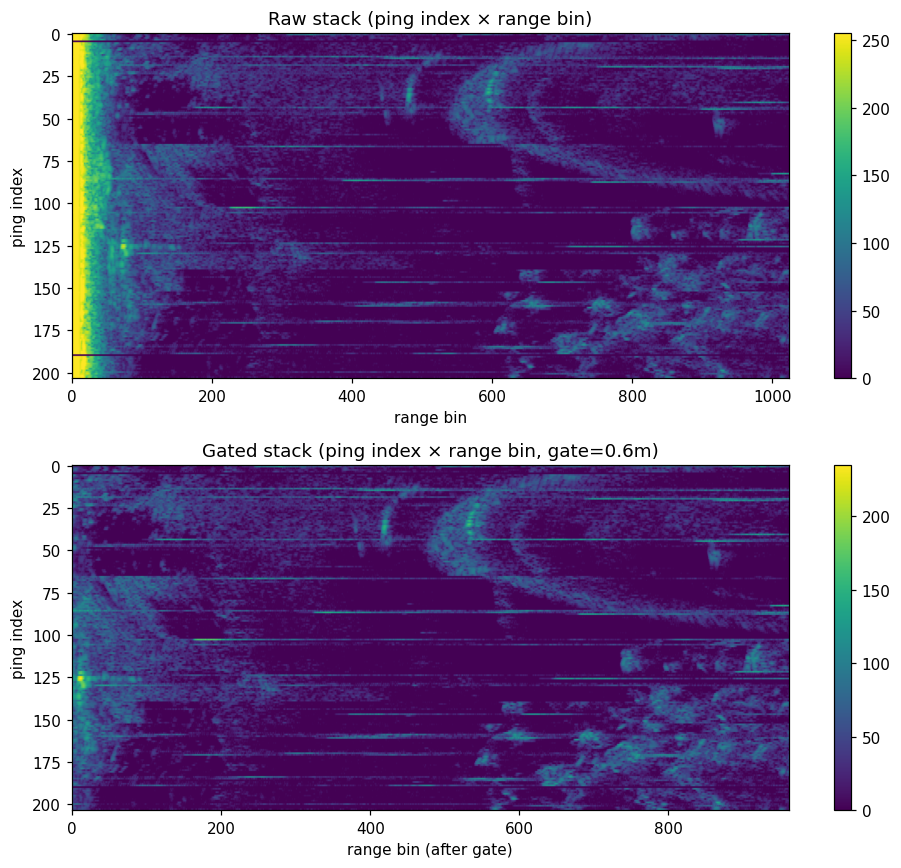

✅ Raw stack visualization complete
⚠️  Note: This shows ping sequence (not spatial angles)
💡 The plots show:
   - Top: Raw data with all samples
   - Bottom: After near-field gating
   - X-axis: Range bins/samples
   - Y-axis: Ping sequence index (NOT spatial angle)
   - Use the polar/cartesian views above for proper spatial visualization


In [5]:
# %% 7) Diagnostic View: Raw stack (ping sequence × range)

print("🔧 Raw data diagnostic view:")

# Plot raw and gated sonar stacks - this is mainly for diagnostics
viz.plot_raw_stack()

print("✅ Raw stack visualization complete")
print("⚠️  Note: This shows ping sequence (not spatial angles)")
print("💡 The plots show:")
print("   - Top: Raw data with all samples")
print("   - Bottom: After near-field gating")
print("   - X-axis: Range bins/samples")
print("   - Y-axis: Ping sequence index (NOT spatial angle)")
print("   - Use the polar/cartesian views above for proper spatial visualization")

🎯 Testing polar radar visualization...
✅ Polar radar visualization successful!


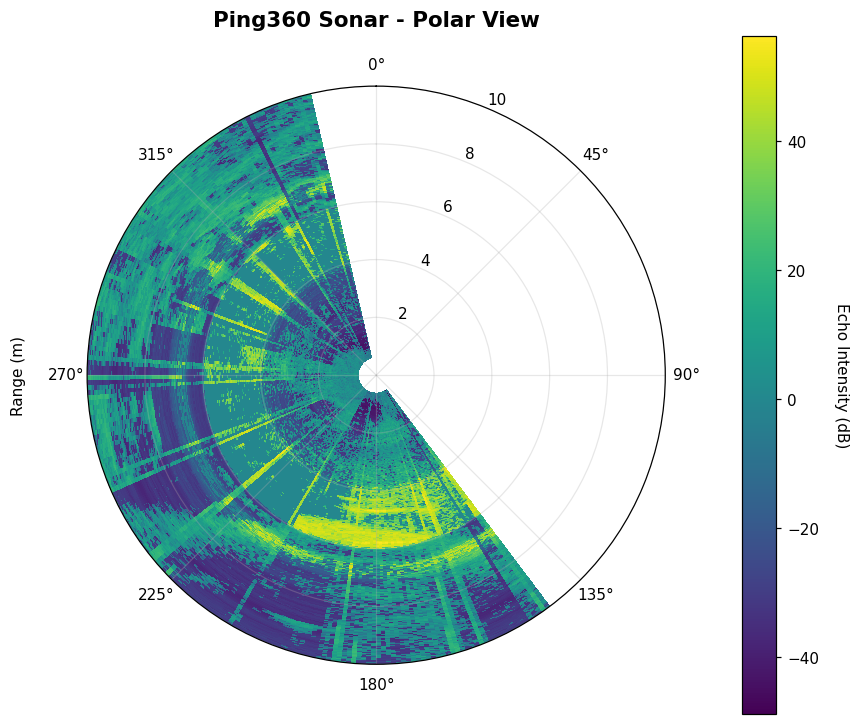

In [6]:
# %% 5) Proper Polar Radar View

print("🎯 Testing polar radar visualization...")

try:
	# Just try the polar radar first (no Cartesian conversion)
	fig1 = viz.plot_polar_radar(figsize=(8, 8), use_processed=True)
	# In Jupyter, just returning the figure will display it
	fig1
	print("✅ Polar radar visualization successful!")

except Exception as e:
	print(f"❌ Error in polar radar: {e}")
	import traceback
	traceback.print_exc()